# Linear Regression for Stock Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# from statsmodels.tsa.arima_process import ArmaProcess
# from statsmodels.tsa.arima_model import ARMA
# from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('../data/ford_close.csv', header = None, names=['ClosingPrice'])

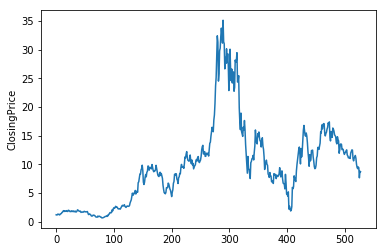

In [3]:
sns.lineplot(x=df.index,y=df['ClosingPrice'])

In [47]:
#rolling window of 5 data points
size=5
windows = [df[i:i+size] for i in range(0,df.shape[0],1)]

In [48]:
ln = LinearRegression()
predictions = []
for i in windows:
    #given a window of points, generate xtrain and ytrain
    ytrain = i.ix[:,0].tolist()
    xtrain = np.asarray(list(i.index)).reshape(-1,1)
    
    #generate xpred by incrementing last value of xtrain
    val = 1+xtrain[-1][0] 
    xpred = np.asarray(val).reshape(-1,1) 
    
    #fit and predict
    ln.fit(xtrain,ytrain) 
    predictions.append(ln.predict(xpred))

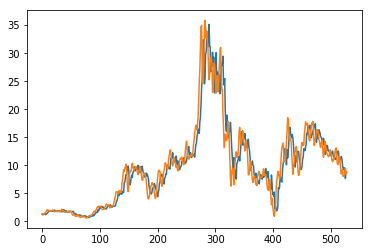

In [49]:
plt.plot(df.index,df['ClosingPrice'],df.index,predictions)
plt.show()

In [50]:
r2_score(df['ClosingPrice'],predictions)

0.8537600957110515

In [51]:
max_error(df['ClosingPrice'],predictions)

13.962485800000028

In [52]:
mean_absolute_error(df['ClosingPrice'],predictions)

1.766691847095961

In [53]:
mean_squared_error(df['ClosingPrice'],predictions)

7.472990112815098

# Simple RNN for Stock Prediction